In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

Macro `_latex_std_` created. To execute, type its name (without quotes).
=== Macro contents: ===
get_ipython().run_line_magic('run', 'Latex_macros.ipynb')
 

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import neural_net_helper
%aimport neural_net_helper

nnh = neural_net_helper.NN_Helper()

# Universal function approximator
A Neural Network is a Universal Function Approximator.

This means that an NN that is sufficiently 
- wide (large number of neurons per layer) 
- and deep (many layers; deeper means the network can be narrower)

can approximate (to arbitrary degree)
the function represented by the training set.

Recall that the training data $\langle \X, \y \rangle = [ (\x^\ip, \y^\ip) |  1 \le i \le m ]$ is a sequence of input/target pairs.

This may look like a strange way to define a function 
- but it is indeed a mapping from the
domain of $\x$ (i.e., $\mathcal{R}^n$) to the domain of $\y$ (i.e., $\mathcal{R})$
- subject to $\y^i = \y^{i'} \;  \text{if} \; \x^i = \x^{i'}$ (i.e., mapping is unique).

We give an intuitive proof for a one-dimensional function
- all vectors $\x, \y, \W, \b$ are length 1.

For simplicity, let's assume that the training set
is presented in order of increasing value of $\x$, i.e.
$$
\x^{(0)} \lt \x^{(1)} \lt \ldots \x^{(m)}
$$

Consider a single neuron with a ReLU activation, computing
$$
\max{}(0, \W \x + \b)
$$

Let's plot the output of this neuron, for varying $\W, \b$.

The slope of the neuron's activation is $\W$ and the intercept is $\b$.

By making slope $\W$ extremely large, we can approach a vertical line.

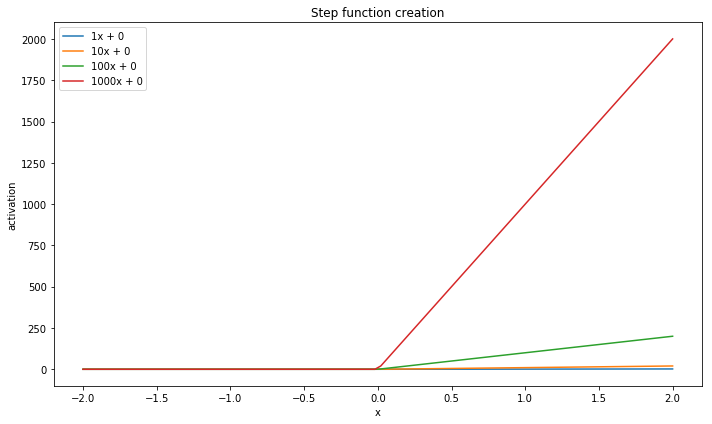

In [4]:
_ = nnh.plot_steps( [ nnh.NN(1,0), nnh.NN(10,0), nnh.NN(100,0), nnh.NN(1000,0), ])

And by varying the intercept (bias) we can shift this vertical line to any point on the feature axis.

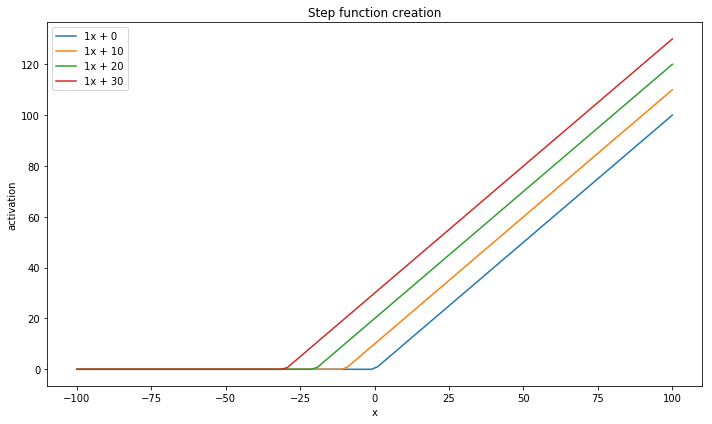

In [14]:
_ = nnh.plot_steps( [ nnh.NN(1,0), nnh.NN(1,10), nnh.NN(1,20), nnh.NN(1,30), ])

With a little effort, we can construct a neuron 
- With near infinite slope
- Rising from the x-axis at any offset.

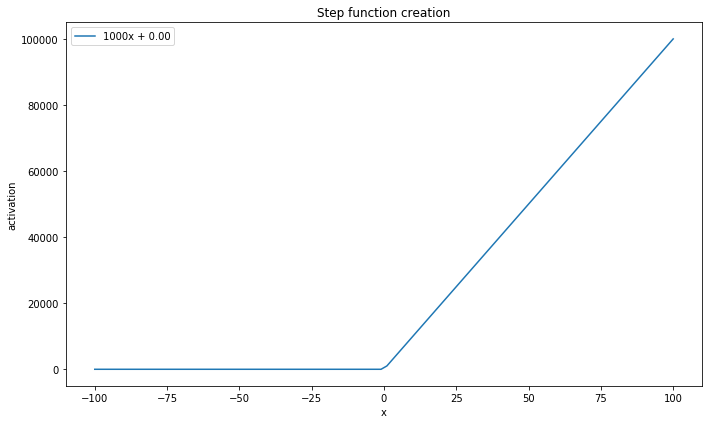

In [38]:
slope = 1000
start_offset = 0

start_step = nnh.NN(slope, -start_offset)

_= nnh.plot_steps( [  start_step ] )

If we create a neuron with intercept "epsilon" from the first neuron


In [39]:
end_offset = start_offset + .0001

end_step = nnh.NN(slope,- end_offset)


and add the two neurons together, we can approximate a step functiion
- unit height
- 0 output at inputs
less than the x-intercept
- unit output for all inputs greater than the intercept).

(The sigmoid function is even more easily transformed into a step function).

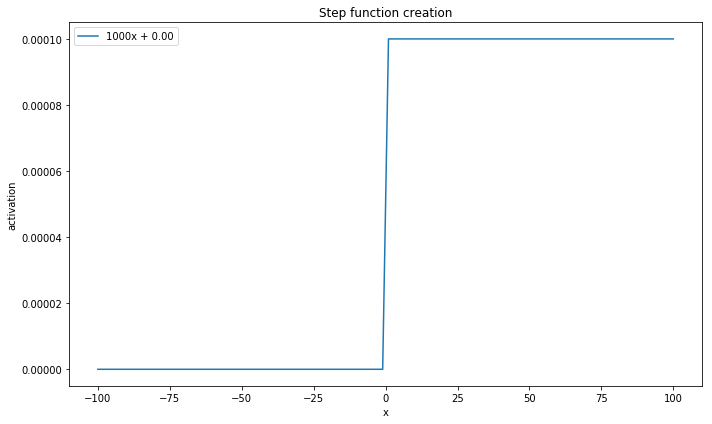

In [40]:
step= {"x": start_step["x"], 
       "y": start_step["y"] - end_step["y"],
       "W": slope,
       "b": 0
      }
_= nnh.plot_steps( [  step ] )

Let us construct $m$ step neurons
- step neuron $i$ with intercept $\x^\ip$, for $1  \le i \le m $

If we connect the $m$ step neurons to a "final" neuron with $0$ bias, linear activation, and weights

$$
\begin{array}[lll] \\
\W_1 & = & \y^{(1)} \\
\W_i & = & \y^{(i)} - \sum_{i'=1}^{i-1}\W_{i'} \\
\end{array}
$$

<table>
    <tr>
        <th><center>Function Approximation by Step functions</center></th>
    </tr>
    <tr>
        <td><img src="images/Universal_Function_Step.jpg" width=1200></td>
    </tr>
</table>

We claim that the output of this neuron approximates the training set.

To see this: 
- Consider what happens when we input $\x^\ip$ to this network.
- The only step neurons that are active (non-zero) are those corresponding
to inputs $1 \le i' \le i$.
- The output of the final neuron is the sum of the outputs of the first $i$ step neurons.
- By construction, this sum is equal to $\y^\ip$.

Thus, our two layer network outputs $\y^\ip$ given input $\x^\ip$.

**Financial analogy:** if we have call options with completely flexible strikes and same expiry,
we can mimic an arbitrary payoff in a similar manner.

In [7]:
print("Done")

Done
